## Importing The Required Libraries 

In [1]:
#we will import the librarys 
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
import pickle

### Exploring Dataset

In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
#we have to check the information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
#we have to check the any null values are there in our dataset
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Splitting of Dataset

In [7]:
## no null values and no categorical values so we can move with splitting the data
# we will separate the dependent and inependent features 
X = df.iloc[: , 2:-1] # independent features
y = df.iloc[: , [-1]] # dependent Dependent fetures


In [8]:
#splitting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
print(X_train.shape,X_test.shape)

(310, 5) (104, 5)


In [10]:
y_train,y_test = y_train.to_numpy(),y_test.to_numpy()

In [11]:
print(y_train.shape,y_test.shape)

(310, 1) (104, 1)


### Adding polynomial Features

In [12]:
# we will use polynomial reg for non linear case datasets
degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train_poly.shape)
print(X_test_poly.shape)

(310, 252)
(104, 252)


### Feature Scaling 

In [13]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_poly)
X_test_scaled = sc.fit_transform(X_test_poly)

In [14]:
X_test_scaled[:5]

array([[ 0.        , -0.69910437, -0.6452034 , ...,  0.27943839,
         0.08066731, -0.29015296],
       [ 0.        ,  0.48150948,  2.91789389, ..., -2.40791604,
        -2.65398507, -2.51599659],
       [ 0.        ,  1.3863595 , -0.55151252, ...,  0.82842843,
         0.76389889,  0.48362689],
       [ 0.        ,  0.61939139,  2.91129229, ..., -2.35560868,
        -2.62822671, -2.54305335],
       [ 0.        , -0.34578197, -0.67943481, ...,  0.24021649,
         0.04829075, -0.30336608]])

## Model Training 

In [15]:
model = Ridge(alpha=1.0)
model.fit(X_train_scaled,y_train)

Ridge()

In [16]:
train_score = model.score(X_train_scaled,y_train)
print('Train Score',train_score)

Train Score 0.686680656856784


#### HyperParameter Tuning 

In [17]:
params = {}
params['degree'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
params['alpha'] = [0.01,0.1,10,40]

In [18]:
def fit(X_train_scaled,y_train,X_test_scaled,y_test,degree,alpha,grid_search=False,exp_name=None):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    sc = StandardScaler()
    sc.fit(X_train_poly)
    X_train_scaled = sc.transform(X_train_poly)
    X_test_scaled = sc.transform(X_test_poly)
    
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled,y_train)
    
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    
    if grid_search:
        scores = [exp_name,degree,alpha,train_score,test_score]
        return scores
    else :
        print('Train Score',train_score)
        print('Test Score',test_score)
        return model,poly,sc

In [19]:
from tqdm.notebook import tqdm

In [20]:
result = []
exp_id = 1
for i in tqdm(range(len(params['degree']))):
    degree = params['degree'][i]
    for j in range(len(params['alpha'])):
        alpha = params['alpha'][j]
        exp_name = 'exp '+str(exp_id)
        exp_id+=1
        result.append(fit(X_train_scaled,y_train,X_test_scaled,y_test,degree,alpha,grid_search=True,exp_name=exp_name))
result

  0%|          | 0/15 [00:00<?, ?it/s]

[['exp 1', 1, 0.01, 0.5660990327623179, 0.5822359999896431],
 ['exp 2', 1, 0.1, 0.5660990327623179, 0.5822359999896431],
 ['exp 3', 1, 10, 0.5660990327623179, 0.5822359999896431],
 ['exp 4', 1, 40, 0.5660990327623179, 0.5822359999896431],
 ['exp 5', 2, 0.01, 0.6558160898286571, 0.693240076562569],
 ['exp 6', 2, 0.1, 0.6558160898286571, 0.693240076562569],
 ['exp 7', 2, 10, 0.6558160898286571, 0.693240076562569],
 ['exp 8', 2, 40, 0.6558160898286571, 0.693240076562569],
 ['exp 9', 3, 0.01, 0.6675857566810679, 0.7050441877647288],
 ['exp 10', 3, 0.1, 0.6675857566810679, 0.7050441877647288],
 ['exp 11', 3, 10, 0.6675857566810679, 0.7050441877647288],
 ['exp 12', 3, 40, 0.6675857566810679, 0.7050441877647288],
 ['exp 13', 4, 0.01, 0.6743212559006084, 0.7129954814760332],
 ['exp 14', 4, 0.1, 0.6743212559006084, 0.7129954814760332],
 ['exp 15', 4, 10, 0.6743212559006084, 0.7129954814760332],
 ['exp 16', 4, 40, 0.6743212559006084, 0.7129954814760332],
 ['exp 17', 5, 0.01, 0.686680656856784, 0

In [21]:
result_df = pd.DataFrame(result,columns=['Experiment_Id','Degree','Alpha','Train Score','Test Score'])
result_df


,Experiment_Id,Degree,Alpha,Train Score,Test Score
0,exp 1,1,0.01,0.566099,0.582236
1,exp 2,1,0.10,0.566099,0.582236
2,exp 3,1,10.00,0.566099,0.582236
3,exp 4,1,40.00,0.566099,0.582236
4,exp 5,2,0.01,0.655816,0.693240
5,exp 6,2,0.10,0.655816,0.693240
6,exp 7,2,10.00,0.655816,0.693240
7,exp 8,2,40.00,0.655816,0.693240
8,exp 9,3,0.01,0.667586,0.705044
9,exp 10,3,0.10,0.667586,0.705044


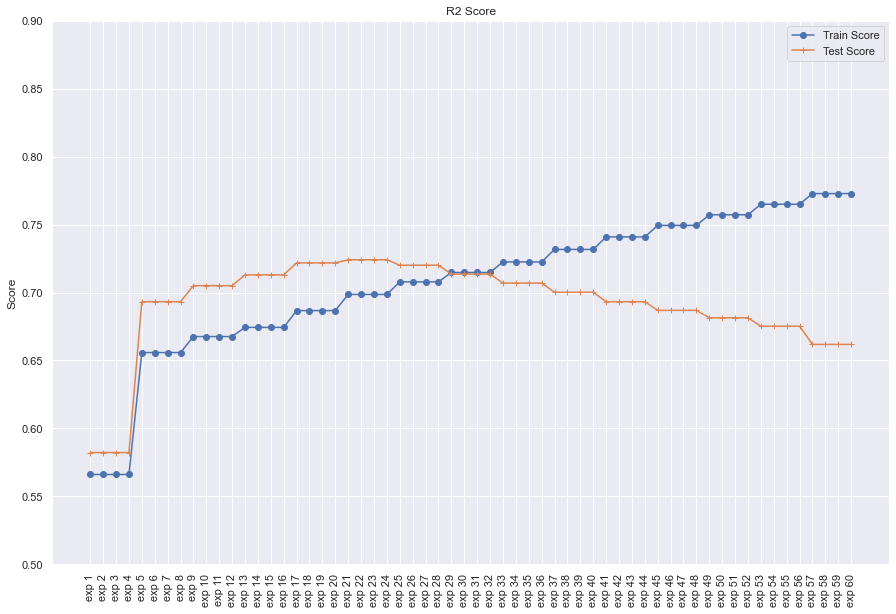

In [22]:
plt.figure(figsize=(15,10), facecolor = 'White')
plt.title('R2 Score')
plt.plot(result_df['Train Score'],marker='o',label = 'Train Score')
plt.plot(result_df['Test Score'],marker='+',label = 'Test Score')
plt.xticks(list(range(len(result_df))),result_df['Experiment_Id'],rotation = 90)
plt.ylabel('Score')
plt.ylim(0.5,0.9)
plt.legend()
plt.show()

In [23]:
result_df.sort_values(by = 'Test Score',ascending=False)

,Experiment_Id,Degree,Alpha,Train Score,Test Score
23,exp 24,6,40.00,0.698586,0.724082
22,exp 23,6,10.00,0.698586,0.724082
21,exp 22,6,0.10,0.698586,0.724082
20,exp 21,6,0.01,0.698586,0.724082
16,exp 17,5,0.01,0.686681,0.721803
19,exp 20,5,40.00,0.686681,0.721803
18,exp 19,5,10.00,0.686681,0.721803
17,exp 18,5,0.10,0.686681,0.721803
27,exp 28,7,40.00,0.707810,0.720091
26,exp 27,7,10.00,0.707810,0.720091


In [24]:
result_df.loc[result_df['Experiment_Id'] == 'exp 31']

,Experiment_Id,Degree,Alpha,Train Score,Test Score
30,exp 31,8,10.0,0.714723,0.713525


# Training the model on selected Hyperparameter

In [25]:
best_model,poly,sc = fit(X_train_scaled,y_train,X_test_scaled,y_test,degree=8,alpha=10)

Train Score 0.7147227274966286
Test Score 0.7135254209876112


### Saving the loading model

In [26]:
import joblib
from pickle import dump

In [27]:
dump(best_model,open('best_model.pkl', 'wb'))
dump(poly,open('poly.pkl', 'wb'))
dump(sc,open('scaler.pkl', 'wb'))

In [28]:
from pickle import load

In [29]:
loaded_model = load(open('best_model.pkl', 'rb'))
poly = load(open('poly.pkl', 'rb'))
sc = load(open('scaler.pkl', 'rb'))

## Deploying

In [30]:
def prediction(model,poly,sc):
    l=[]
    l.append(float(input('Enter House Age')))
    l.append(float(input('distance to the nearest MRT station')))
    l.append(float(input(' number of convenience stores')))
    l.append(float(input('latitude')))
    l.append(float(input('longitude')))
    arr = np.asarray([l])
    arr = poly.transform(arr)
    scaler_arr = sc.transform(arr)
    print('Price of the house per unit area:',round(model.predict(scaler_arr)[0][0],2))

In [31]:
prediction(loaded_model,poly,sc)

Enter House Age13.3
distance to the nearest MRT station561.98
 number of convenience stores5
latitude24.9874
longitude121.54391
Price of the house per unit area: 45.29
